In [3]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [14]:
def build_model(my_learning_rate):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))
    model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model

def train_model(model, feature, label, epochs, batch_size):
    history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    epochs = history.epoch

    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]
    return trained_weight, trained_bias, epochs, rmse

In [74]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the training feature and label."""
    
    # Label the axes.
    plt.xlabel("feature")
    plt.ylabel("label")
    
    # Plot the feature values vs. label values.
    plt.scatter(feature, label)
    
    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    x0 = 0.0
    y0 = trained_bias[0]
    x1 = feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    print(y1)
    plt.plot([x0, x1], [y0, y1[0][0]], c='r')

    # Render the scatter plot and the red line.
    plt.show()

def plot_the_loss_curve(epochs, rmse):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()
    

In [75]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/450
1/1 [==============================] - 0s 93ms/step - loss: 207.6045 - root_mean_squared_error: 14.4085
Epoch 2/450
1/1 [==============================] - 0s 2ms/step - loss: 139.3501 - root_mean_squared_error: 11.8047
Epoch 3/450
1/1 [==============================] - 0s 3ms/step - loss: 102.1276 - root_mean_squared_error: 10.1058
Epoch 4/450
1/1 [==============================] - 0s 4ms/step - loss: 77.2305 - root_mean_squared_error: 8.7881
Epoch 5/450
1/1 [==============================] - 0s 3ms/step - loss: 59.2275 - root_mean_squared_error: 7.6959
Epoch 6/450
1/1 [==============================] - 0s 3ms/step - loss: 45.6940 - root_mean_squared_error: 6.7597
Epoch 7/450
1/1 [==============================] - 0s 3ms/step - loss: 35.3040 - root_mean_squared_error: 5.9417
Epoch 8/450
1/1 [==============================] - 0s 3ms/step - loss: 27.2383 - root_mean_squared_error: 5.2190
Epoch 9/450
1/1 [==============================] - 0s 3ms/step - loss: 20.9471 - root_mea

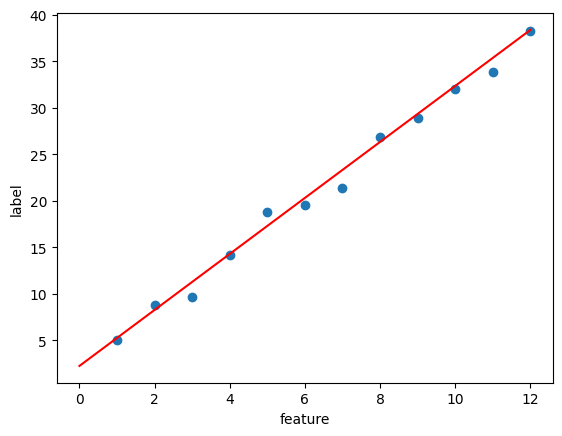

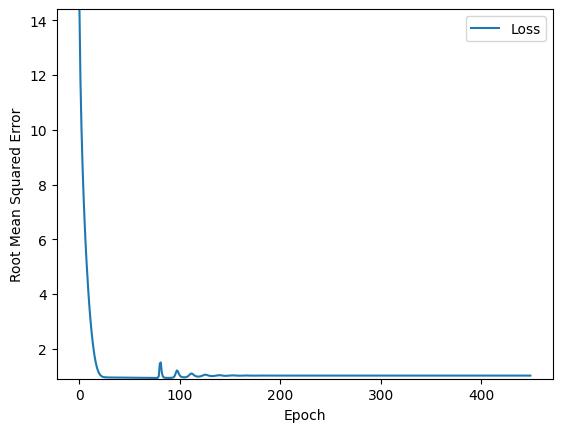

In [84]:
learning_rate=0.1
epochs=450
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)

plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
# Summary of hyperparameter tuning
# Most machine learning problems require a lot of hyperparameter tuning. Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly. You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:
# * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.
# * If the training loss does not converge, train for more epochs.
# * If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
# * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
# * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
# * Setting the batch size to a very small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
# * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.
# Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.